### Начинаем с импорта необходимых модулей

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


### Считываем csv файлы с помощью Pandas (указываем путь до файла на Google drive)

In [262]:
questions = pd.read_csv("questions.csv", sep=',')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [263]:
lectures = pd.read_csv('lectures.csv', sep=',')
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


### Для большого файла указываем типы данных столбцов  ###

In [264]:
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int64",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}

train_data = pd.read_csv("train.csv", dtype=dtypes)

### Произведем анализ полученных DataFrames:
### 1. questions

In [265]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


**DataFrame состоит из 13523 строк, 5 столбцов, отсутстсвует одно значение "tags"**

In [266]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


**Все вопросы относятся к разным part (всего их 7), найдем распределние всех вопросов по part**

In [267]:
questions.part.value_counts()

part
5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: count, dtype: int64

**Отобразим это на диаграмме**

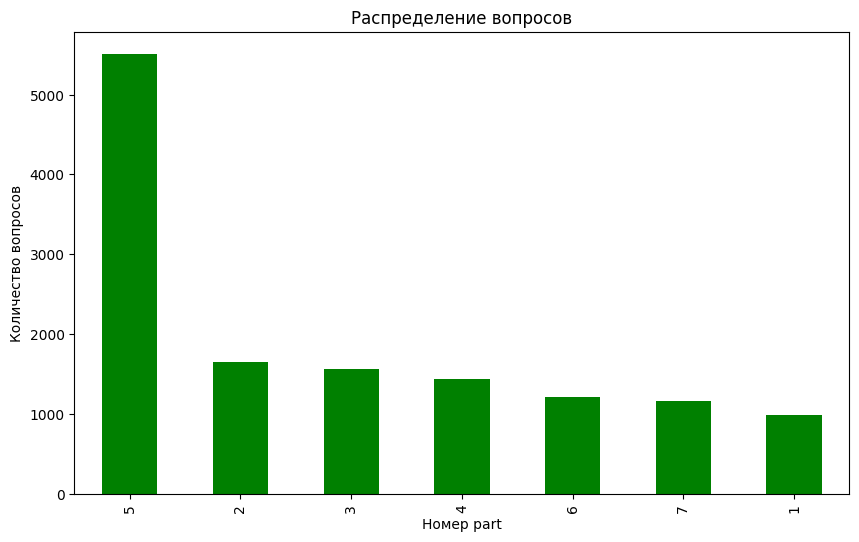

In [268]:
# Построим диаграмму
plt.figure(figsize=(10, 6))
questions.part.value_counts().plot(kind='bar', color='green')
plt.title('Раcпределение вопросов')
plt.xlabel('Номер part')
plt.ylabel('Количество вопросов')
plt.show()

**Узнаем количество уникальных тегов**

In [269]:
# Изменим тип данных
questions['tags'] = questions['tags'].astype(str)

# Создадим список из всех тегов
tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]

# Уберем повторяющиеся
tags = set(tags)
tags = list(tags)

print(f'{len(tags)}')

188


### 2. lectures

In [270]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


**DataFrame состоит из 418 строк, 4 столбцов, нет ниодного пропущенного значения**

In [271]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


**Все лекции относятся к разным part (всего их 7), найдем распределние всех вопросов по part**

In [272]:
lectures.part.value_counts()

part
5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: count, dtype: int64

**Отобразим это на диаграмме**

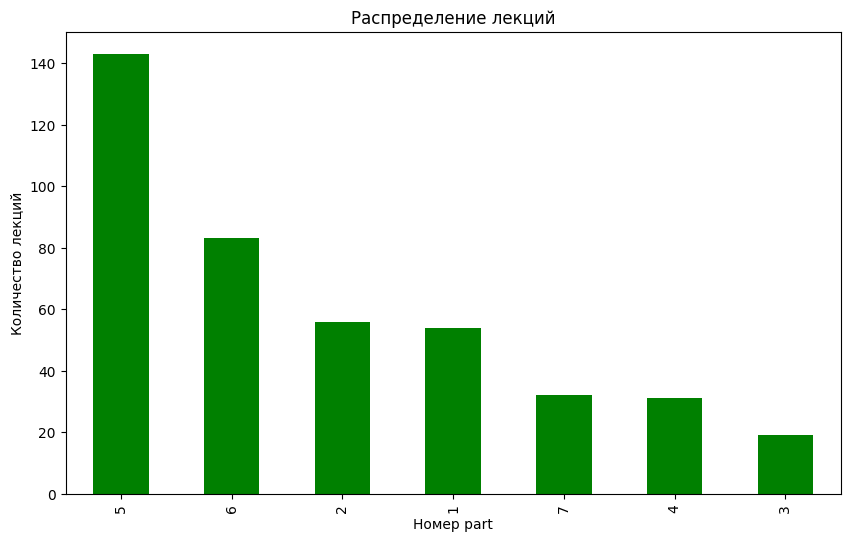

In [273]:
# Построим диаграмму
plt.figure(figsize=(10, 6))
lectures.part.value_counts().plot(kind='bar', color='green')
plt.title('Раcпределение лекций')
plt.xlabel('Номер part')
plt.ylabel('Количество лекций')
plt.show()

**Узнаем количество ID лекций, тегов и типов**

In [274]:
lectures.nunique()

lecture_id    418
tag           151
part            7
type_of         4
dtype: int64

**Составим диаграмму типов лекций**

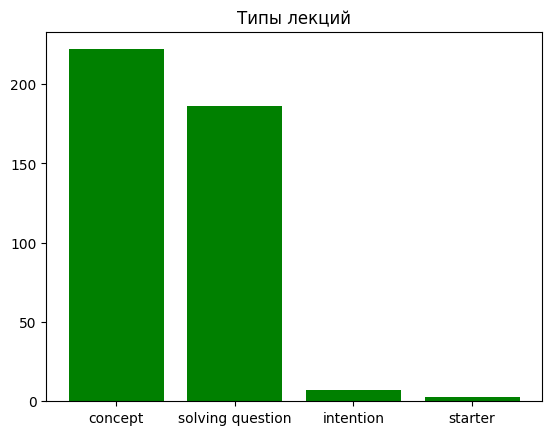

In [275]:
part1 = lectures['type_of'].value_counts()['concept']
part2 = lectures['type_of'].value_counts()['solving question']
part3 = lectures['type_of'].value_counts()['intention']
part4 = lectures['type_of'].value_counts()['starter']
total = [part1, part2, part3, part4]
categories = ['concept', 'solving question', 'intention', 'starter']

plt.bar(categories,total, color='green')


# Подписи осей и заголовок

plt.title('Типы лекций')

# Отображение диаграммы
plt.show()

### 3. train

In [276]:
train_data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,NaN,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,False
2,2,118363,115,128,False,0,0,1,55000.0,False
3,3,131167,115,7860,False,3,0,1,19000.0,False
4,4,137965,115,7922,False,4,1,1,11000.0,False


In [277]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int16  
 4   content_type_id                 boolean
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(2), float32(1), int16(2), int64(3), int8(2)
memory usage: 3.6 GB


**DataFrame состоит из 101230332 строк, 10 столбцов**

In [278]:
train_data.describe()

,row_id,timestamp,user_id,content_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,9.040624e+02,1.376123e+00,6.251644e-01,2.542384e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


**Узнаем сколько всего студентов и сколько из них хотя бы 1 раз изучали лекции**

In [279]:
all_student = train_data['user_id'].nunique()

mask_lectures = train_data['content_type_id'] == True
lectures_student = train_data[mask_lectures]['user_id'].nunique()

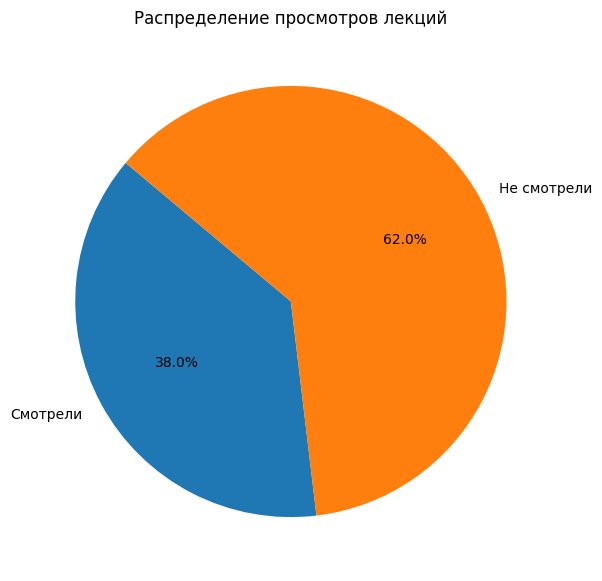

In [280]:
# Построим диаграмму
# Данные
part1 = lectures_student
part2 = all_student - lectures_student

# Доли
dol = [part1, part2]
labels = ['Смотрели', 'Не смотрели']

# Создание круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(dol, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение просмотров лекций')
plt.show()

**Произведем анализ записей из таблицы и узнаем распределение ответов на вопросы и обращения студентов к лекциям**

In [282]:
train_data['content_type_id'].value_counts(normalize=True)

content_type_id
False    0.980648
True     0.019352
Name: proportion, dtype: Float64

**Отобразим это на диаграмме**

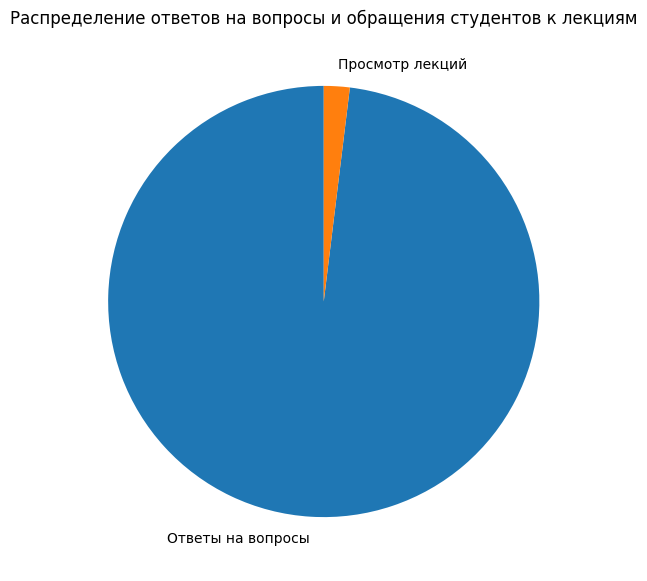

In [283]:
# Построим диаграмму
plt.figure(figsize=(10, 7))
train_data['content_type_id'].value_counts(normalize=True).plot(kind='pie', autopct=None, startangle=90, color='green', labels = ['Ответы на вопросы', 'Просмотр лекций'])
plt.xlabel('')
plt.ylabel('')
plt.title('Распределение ответов на вопросы и обращения студентов к лекциям')

plt.show()

**Узнаем частоту правильных ответов студентов**

In [284]:
# Правильные ответы
mask_correctly = train_data['answered_correctly'] == 1
student_correctly = train_data[mask_correctly]['user_id'].shape[0]

# Неправильные ответы
mask_no_correctly = train_data['answered_correctly'] == 0
student_no_correctly = train_data[mask_no_correctly]['user_id'].shape[0]

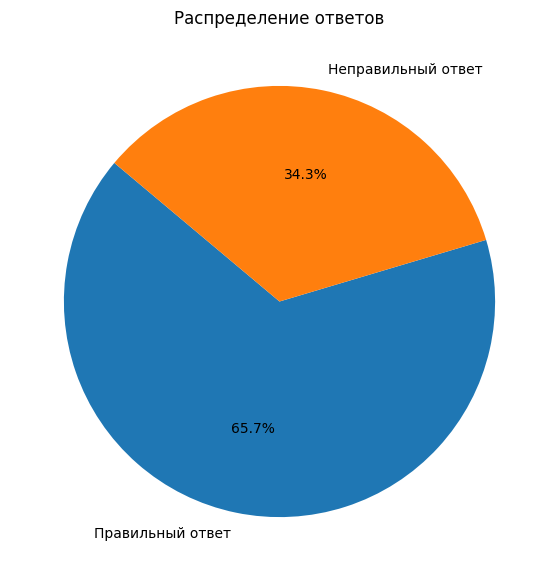

In [285]:
# Построим диаграмму
# Данные
part1 = student_correctly
part2 = student_no_correctly


# Доли
dol = [part1, part2]
labels = ['Правильный ответ', 'Неправильный ответ']

# Создание круговой диаграммы
plt.figure(figsize=(10, 7))
plt.pie(dol, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение ответов')
plt.show()

**Определим студентов с наибольшим числом правильных ответов**

In [286]:
# Маска для фильтрации только вопросов
mask_no_lectures = train_data['answered_correctly'] != -1

# Группировка нового DataFrame с подсчетом правильных ответов для каждого студента
a = train_data[mask_no_lectures].groupby('user_id').agg({'answered_correctly' : 'sum'}).reset_index()

# Сортировка полученных результатов от снаибольшего числа правильных ответов к наименьшему
a = a.sort_values(by='answered_correctly', ascending=False)

**Первые 5 студентов**

In [287]:
total = a[:5]
display(total)

,user_id,answered_correctly
392133,2139561972,14300
295612,1615528747,13678
61749,338684437,13416
337432,1842816145,13086
191252,1047202059,13034


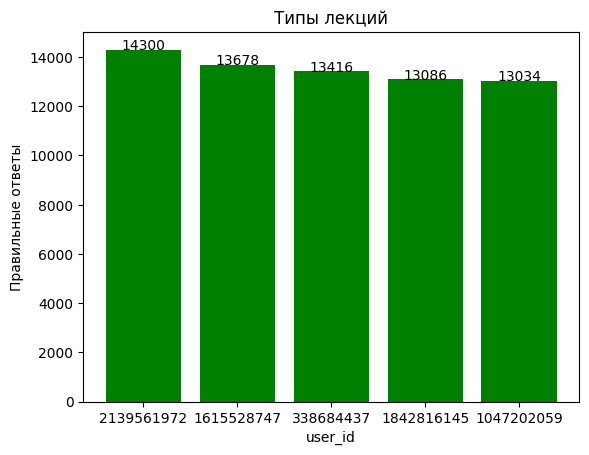

In [288]:
# Построим диаграмму

plt.bar([str(x) for x in total['user_id']],total['answered_correctly'], color='green')

for i, value in enumerate(total['answered_correctly']):
    plt.text(i, value + 1, str(value), ha='center')

# Подписи осей и заголовок
plt.ylabel('Правильные ответы')
plt.xlabel('user_id')

plt.title('Типы лекций')

# Отображение диаграммы
plt.show()